In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Define the path to the dataset in Google Drive
dataset_dir = '/content/drive/MyDrive/dataset/archive (1)/data'

In [19]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Prepare the data
categories = ["with_mask", "without_mask"]
data = []
labels = []
img_size = 128

In [14]:
# Load and process images
for category in categories:
    path = os.path.join(dataset_dir, category)
    label = categories.index(category)  # 0 for "with_mask", 1 for "without_mask"

    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Failed to load image {img}")
                continue

            # To check all images are resized to 128x128 pixels
            image = cv2.resize(image, (img_size, img_size))
            data.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

In [15]:
# Check if all images have the same shape
data = [cv2.resize(img, (img_size, img_size)) for img in data if img.shape[:2] == (img_size, img_size)]

In [16]:
# Convert lists to numpy arrays
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [20]:
# Building a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6717 - loss: 0.8525 - val_accuracy: 0.9215 - val_loss: 0.2106
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 993ms/step - accuracy: 0.9202 - loss: 0.1991 - val_accuracy: 0.9215 - val_loss: 0.2138
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9350 - loss: 0.1658 - val_accuracy: 0.9462 - val_loss: 0.1505
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9587 - loss: 0.1001 - val_accuracy: 0.9417 - val_loss: 0.1594
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9825 - loss: 0.0646 - val_accuracy: 0.9439 - val_loss: 0.1885
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9749 - loss: 0.0744 - val_accuracy: 0.9462 - val_loss: 0.2064
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9778 - loss: 0.0520 - val_accuracy: 0.9417 - val_loss: 0.1807
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9283 - val_lo

In [23]:
# Evaluate the model
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step


In [24]:
# Print a classification report
print(classification_report(y_test, predictions, target_names=categories))

              precision    recall  f1-score   support

   with_mask       0.94      0.95      0.94       235
without_mask       0.94      0.93      0.94       211

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446



In [25]:
# Create and plot a confusion matrix
cm = confusion_matrix(y_test, predictions)

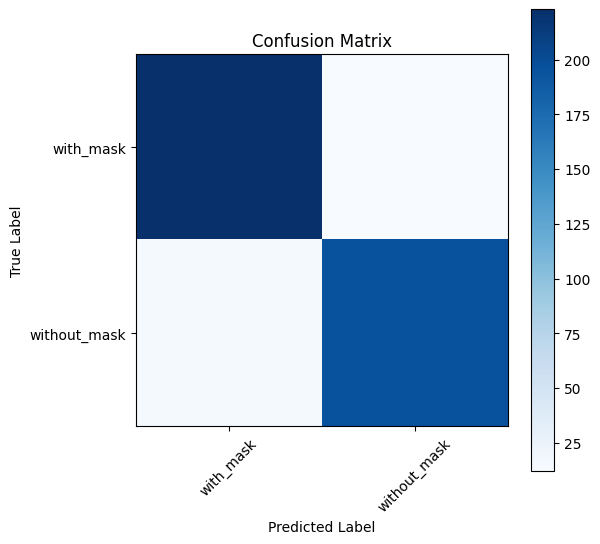

In [26]:
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# Visualize Training and Validation Performance
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

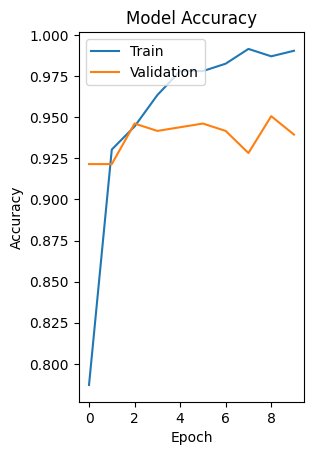

In [28]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

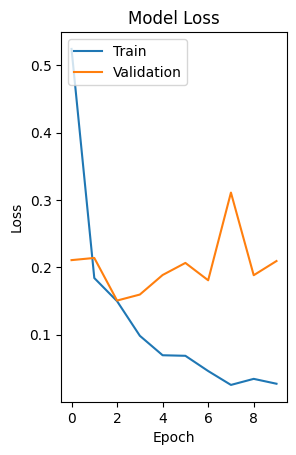

In [29]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [30]:
# Visualize Model Predictions on Test Data
def plot_predictions(X, y_true, y_pred, categories):
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(f"True: {categories[y_true[i]]}, Pred: {categories[y_pred[i][0]]}")
        plt.axis('off')
    plt.show()

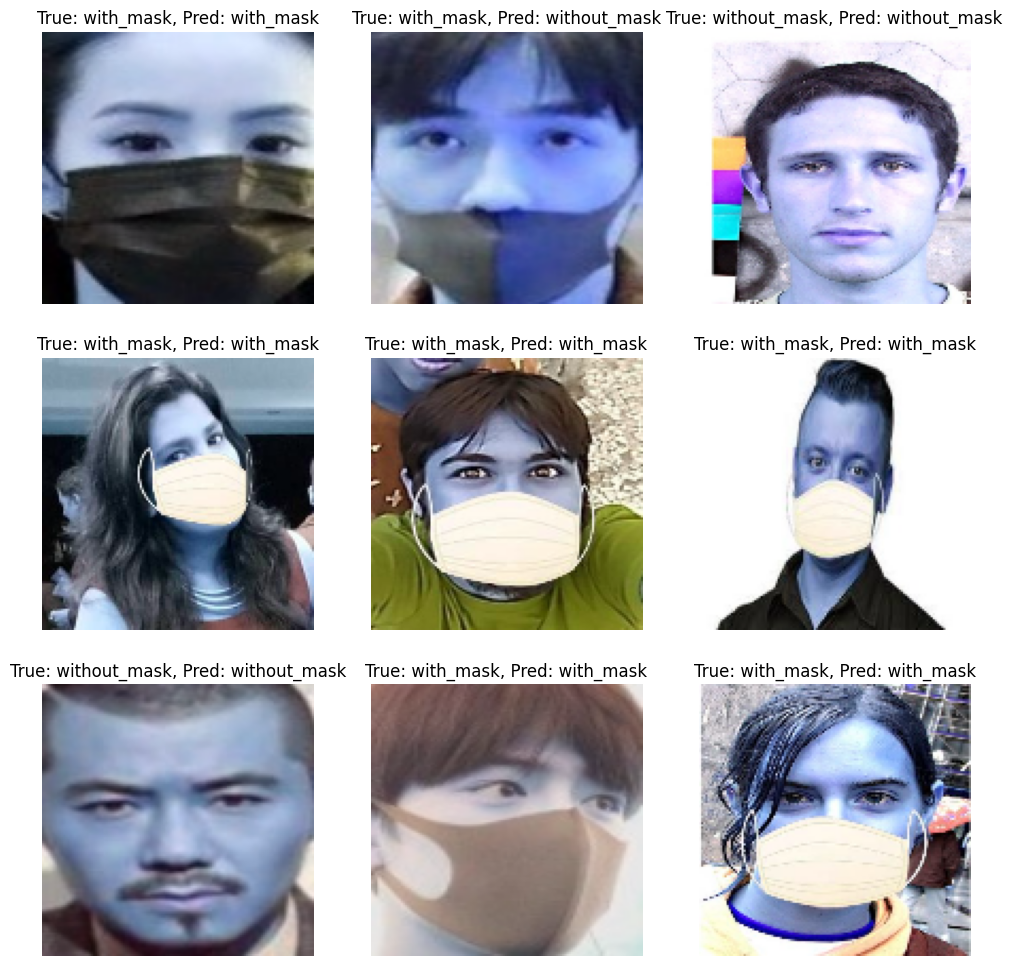

In [31]:
# Show predictions on some test images
plot_predictions(X_test, y_test, predictions, categories)

In [33]:
# Save the model
model.save("/content/drive/MyDrive/face_mask_detector_model.keras")